In [15]:
import pandas as pd
#Reference: https://www.kaggle.com/cemutku/k-means-and-hierarchical-clustering-implementation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importing Dataset
df = pd.read_csv("C://Users//user//Desktop//Course Content//Dataset_Case2.csv")

In [4]:
df.head()

,CustomerID,Age,Income (INR) (in lakhs per annum),Demography,Gender
0,CUS1,25,5,Rural,Male
1,CUS2,30,10,Urban,Male
2,CUS3,25,8,Rural,Female
3,CUS4,35,15,Rural,Female
4,CUS5,45,20,Urban,Female


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   CustomerID                         8 non-null      object
 1   Age                                8 non-null      int64 
 2   Income (INR) (in lakhs per annum)  8 non-null      int64 
 3   Demography                         8 non-null      object
 4   Gender                             8 non-null      object
dtypes: int64(2), object(3)
memory usage: 452.0+ bytes


In [6]:
df.isna().sum()

CustomerID                           0
Age                                  0
Income (INR) (in lakhs per annum)    0
Demography                           0
Gender                               0
dtype: int64

In [ ]:
#DROPPPING CUSTOMER ID COLUMN

In [7]:
df.drop(['CustomerID'],axis=1,inplace=True)

In [8]:
df.head()

,Age,Income (INR) (in lakhs per annum),Demography,Gender
0,25,5,Rural,Male
1,30,10,Urban,Male
2,25,8,Rural,Female
3,35,15,Rural,Female
4,45,20,Urban,Female


In [9]:
from sklearn.preprocessing import LabelEncoder
# Define a mapping dictionary for unit labels
unit_mapping = {'Male': 0, 'Female': 1}
unit_mapping1 = {'Rural': 0, 'Urban': 1}
# Suppose 'unit_column' is the column where you want to assign integer labels
df['Gender'] = df['Gender'].map(unit_mapping)
df['Demography'] = df['Demography'].map(unit_mapping1)


In [10]:
df.head()

,Age,Income (INR) (in lakhs per annum),Demography,Gender
0,25,5,0,0
1,30,10,1,0
2,25,8,0,1
3,35,15,0,1
4,45,20,1,1


In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df['Age']=sc.fit_transform(df[['Age']])
df['Income (INR) (in lakhs per annum)']=sc.fit_transform(df[['Income (INR) (in lakhs per annum)']])
df.head()

,Age,Income (INR) (in lakhs per annum),Demography,Gender
0,-0.872357,-1.166880,0,0
1,-0.237915,-0.286216,1,0
2,-0.872357,-0.638482,0,1
3,0.396526,0.594448,0,1
4,1.665408,1.475113,1,1


In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
clusters = kmeans.fit_predict(df)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
clusters

array([1, 1, 1, 0, 0, 1, 0, 1])

In [18]:
df["Cluster"] = clusters
df.head(8)

,Age,Income (INR) (in lakhs per annum),Demography,Gender,Cluster
0,-0.872357,-1.166880,0,0,1
1,-0.237915,-0.286216,1,0,1
2,-0.872357,-0.638482,0,1,1
3,0.396526,0.594448,0,1,0
4,1.665408,1.475113,1,1,0
5,-1.506798,-1.166880,1,0,1
6,1.030967,1.475113,1,1,0
7,0.396526,-0.286216,0,0,1


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

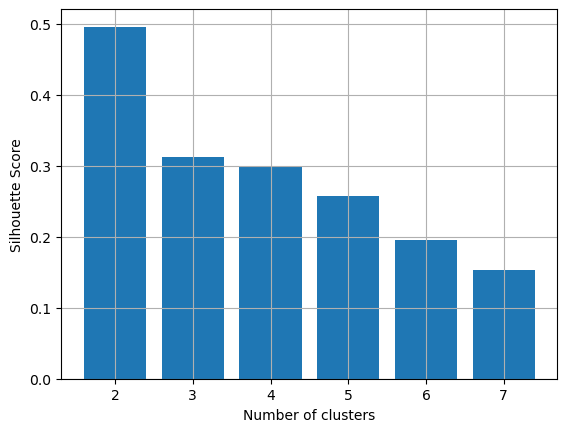

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = [] 

for n_cluster in range(2,8):
    silhouette_scores.append( 
        silhouette_score(df, KMeans(n_clusters = n_cluster).fit_predict(df))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.grid()
plt.show() 


In [20]:
silhouette_avg = silhouette_score(df, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.4956386263861907


In [ ]:
#A score of 0.495 suggests a reasonable separation between clusters.
#Silhouette scores range from -1 to 1. A higher score indicates better-defined clusters, and 0.495 is generally considered a good score.

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)
inertia = kmeans.inertia_
print("Inertia:", inertia)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Inertia: 6.863600362176351


In [ ]:
#The inertia value of 6.864 suggests that the clusters are relatively compact. 

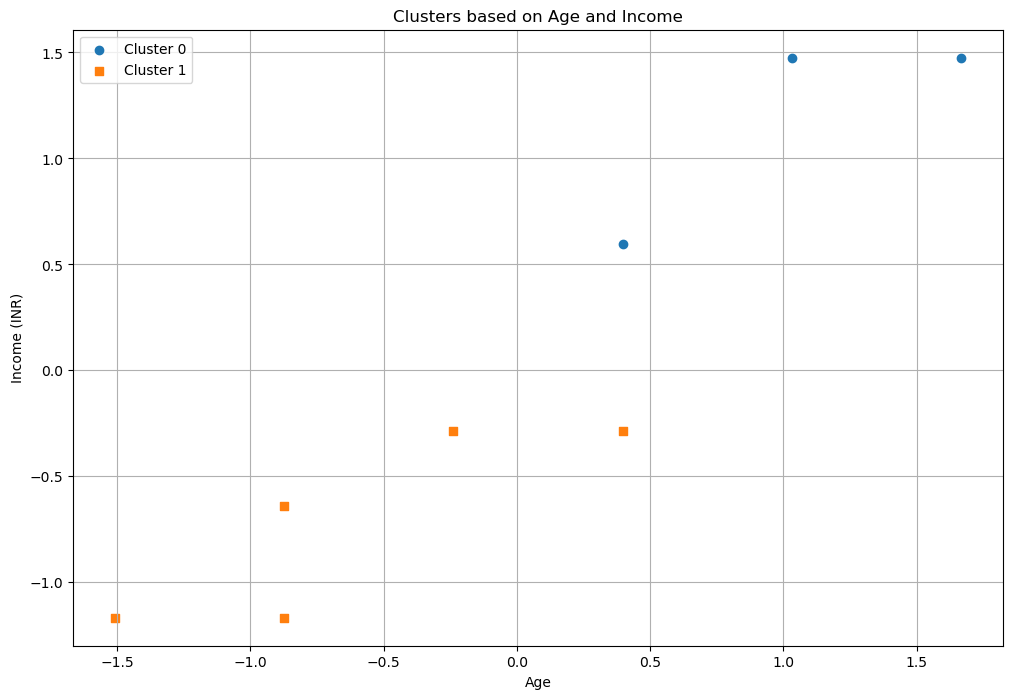

In [22]:
import matplotlib.pyplot as plt
import pandas as pd


# Extracting relevant columns for visualization
features = df[['Age', 'Income (INR) (in lakhs per annum)', 'Demography', 'Gender', 'Cluster']]

# Create separate DataFrames for each cluster
cluster_0 = features[features['Cluster'] == 0]
cluster_1 = features[features['Cluster'] == 1]

# Plotting the clusters
plt.figure(figsize=(12, 8))

# Scatter plot for Cluster 0
plt.scatter(cluster_0['Age'], cluster_0['Income (INR) (in lakhs per annum)'], label='Cluster 0', marker='o')

# Scatter plot for Cluster 1
plt.scatter(cluster_1['Age'], cluster_1['Income (INR) (in lakhs per annum)'], label='Cluster 1', marker='s')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Income (INR)')
plt.title('Clusters based on Age and Income')
plt.legend()
plt.grid(True)
plt.show()

# Interpretation  of the Data of Case 2

Cluster 1 appears to have customers with lower income and younger age, mostly from rural areas.

Cluster 0 includes customers with higher income and older age, mostly from urban areas as seem from the graph above.

There is also a point where the clusters nearly line up parrallel with each other at age between 0.0 to 0.5.


# Recommendations

For Cluster 1 (Lower Age, Lower Income, Predominantly Rural, Mostly Male):

1. Tailor Financial Services for Younger Demographic: Develop and offer banking services that cater specifically to the financial needs and preferences of younger customers. Create specialized packages with lower fees or minimum balance requirements to make banking more accessible.

2. Financial Literacy Initiatives: Implement educational programs or workshops on financial literacy to empower younger customers in managing their finances effectively.

    3.Emphasize Digital Solutions: Recognizing the tech-savvy nature of younger customers, focus on user-friendly digital banking solutions. Introduce mobile apps and online banking features to enhance convenience and accessibility.

For Cluster 0 (Higher Income, Older Age, Predominantly Urban):

1. Tailor Premium Banking Services:Design premium banking services that align with the financial goals and preferences of an older and higher-income demographic.

Personalized Wealth Management: Offer personalized wealth management services to assist older customers in securing their . financial future.

Enhance In-Person Customer Service: Given the likelihood of urban residence, prioritize in-person customer service with well-trained staff in urban branches.

The convergence in the age range 0.0 to 0.5 may warrant further investigation or targeted marketing efforts to address potential overlaps in customer needs.

Cluster 1 Analysis:

Cluster 1 is characterized by individuals with higher age, higher income, predominantly from urban areas, and mostly comprising females.



Personalized Wealth Management:

Deliver personalized investment advisory services specifically designed for wealth management, considering the financial goals of this mature and affluent demographic.

Diverse Investment Products:

Introduce a diversified range of investment products catering to various risk appetites within this cluster.
Premium Banking Services:

Launch premium banking services that come with exclusive benefits tailored to the needs and preferences of high-income customers in urban areas.

Personalized Support and Priority Services:

Provide personalized customer support and prioritize services to enhance the overall banking experience for this segment.

Tailored Loan Products:

Develop customized loan products, such as mortgage or personal loans, with favorable terms to meet the specific financial requirements of this demographic.

Exclusive Credit Card Offerings:

Consider offering credit cards with exclusive perks and rewards designed to appeal to the preferences and lifestyle of the predominantly female customers within this cluster.